<a href="https://colab.research.google.com/github/ItaloAndress/ItaloAndress/blob/main/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install pyspark
!pip install pypokedex
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import files
uploaded = files.upload()

Saving pokemon.csv to pokemon.csv


In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, stddev

In [11]:
spark = SparkSession.builder.appName("EstadisticaDescriptiva").getOrCreate()
df = spark.read.csv("pokemon.csv", header=True, inferSchema=True)

Ingresa el número del Pokémon: 150
+------+------+-----------+---------+
|Numero|Nombre|tipo       |Clase    |
+------+------+-----------+---------+
|150   |Mewtwo|['Psychic']|Legendary|
+------+------+-----------+---------+



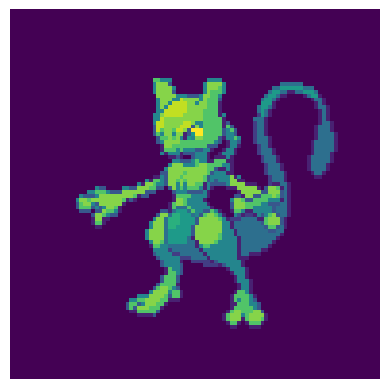

In [45]:
import pypokedex
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import numpy as np
from PIL import Image
import requests

# Configurar Matplotlib para mostrar las imágenes en el notebook
%matplotlib inline

# Crear una sesión de Spark
spark = SparkSession.builder.appName("EjemploPySpark").getOrCreate()

# Cargar el archivo CSV en un DataFrame
df = spark.read.csv("pokemon.csv", header=True, inferSchema=True)

# Función para buscar un Pokémon por su número (ID)
# y mostrar solo ciertas columnas con nombres modificados
def buscar_pokemon_por_id(pokemon_id):
    # Filtrar el DataFrame por el ID del Pokémon
    pokemon = df.filter(col("pokemon_id") == pokemon_id)
    # Seleccionar y renombrar las columnas especificadas
    columnas_seleccionadas = ["pokemon_id", "pokemon_name", "type", "rarity"]
    pokemon_seleccionado = pokemon.select(
        col("pokemon_id").alias("Numero"),
        col("pokemon_name").alias("Nombre"),
        col("type").alias("tipo"),
        col("rarity").alias("Clase")
    )
    return pokemon_seleccionado

# Ingresar el número del Pokémon que deseas buscar
pokemon_id = int(input("Ingresa el número del Pokémon: "))

# Buscar y mostrar el Pokémon correspondiente con las columnas renombradas
pokemon_encontrado = buscar_pokemon_por_id(pokemon_id)
pokemon_encontrado.show(truncate=False)

# Obtener la información del Pokémon usando PyPokedex
pokemon = pypokedex.get(dex=pokemon_id)

# Mostrar la imagen del Pokémon
img_url = pokemon.sprites.front.get('default')
# Use Pillow library to open the image from the url
response = requests.get(img_url, stream=True)
response.raw.decode_content = True
img = Image.open(response.raw)
# convert the image to a numpy array
img = np.array(img)

plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()